# E. Coli in Chicago Beaches 

In this workbook you will find the step by step of our project. 

We starterd by doing the ETL (Extract Transform and Load) portion for out data. Then we chose the linear regression model to make the machine learning process happen.


In [1]:
#Importing dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

# Step 1: Beach Lab Data


In [2]:
#Read in the CSV
df = pd.read_csv('../Resources/Beach_Lab_Data.csv')

In [3]:
#Sorting values

df.sort_values('DNA Sample Timestamp',ascending=False)

,DNA Test ID,DNA Sample Timestamp,Beach,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Culture Test ID,Culture Sample 1 Timestamp,Culture Sample 1 Reading,Culture Sample 2 Reading,Culture Reading Mean,Culture Note,Culture Sample Interval,Culture Sample 2 Timestamp,Latitude,Longitude,Location
7772,5898.0,09/04/2017 12:00:00 AM,57th Street,234.0,389.0,301.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7911,-87.5797,"(41.7911, -87.5797)"
18404,5903.0,09/04/2017 12:00:00 AM,Foster,6.0,105.0,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.9785,-87.6515,"(41.9785, -87.6515)"
9829,5896.0,09/04/2017 12:00:00 AM,Calumet,129.0,143.0,135.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.7142,-87.5299,"(41.7142, -87.5299)"
7506,5911.0,09/04/2017 12:00:00 AM,Osterman,36.0,193.0,83.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.9877,-87.6545,"(41.9877, -87.6545)"
9234,5912.0,09/04/2017 12:00:00 AM,Leone,111.0,118.0,114.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0131,-87.6635,"(42.0131, -87.6635)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24278,NaN,NaN,Juneway,NaN,NaN,NaN,108062.0,08/19/2013 12:00:00 AM,2.0,1.0,1.4,NaN,NaN,NaN,42.0224,-87.6674,"(42.0224, -87.6674)"
24280,NaN,NaN,Leone,NaN,NaN,NaN,109868.0,07/31/2014 12:00:00 AM,25.0,18.0,21.2,NaN,NaN,NaN,42.0131,-87.6635,"(42.0131, -87.6635)"
24281,NaN,NaN,Howard,NaN,NaN,NaN,113525.0,07/26/2016 09:00:00 AM,30.0,36.0,32.9,NaN,1.0,07/26/2016 09:01:00 AM,42.0188,-87.6663,"(42.0188, -87.6663)"
24283,NaN,NaN,Howard,NaN,NaN,NaN,112193.0,05/24/2012 12:00:00 AM,10.8,8.6,9.6,NaN,NaN,NaN,42.0188,-87.6663,"(42.0188, -87.6663)"


In [4]:
# Deleting NaN values
df = df[df['DNA Reading Mean'].notna()]

In [5]:
df = df.drop(columns=['Culture Test ID','Culture Sample 1 Timestamp','Culture Sample 1 Reading','Culture Sample 2 Reading','Culture Reading Mean','Culture Note','Culture Sample Interval','Culture Sample 2 Timestamp'])

In [6]:
#Using pd.datetime pandas function
df['Date'] = pd.to_datetime(df['DNA Sample Timestamp'], errors = 'coerce')

In [7]:
#Cleaning the time stap data in the df
df['Sample_Date'] = pd.to_datetime(df['Date']).dt.to_period('D')

In [8]:
#Dropping NaN values for the sample date
df = df[df['Sample_Date'].notna()]

In [9]:
#Sorting the df by sample data
df.sort_values('Sample_Date',ascending=False)

,DNA Test ID,DNA Sample Timestamp,Beach,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude,Location,Date,Sample_Date
25279,15413.0,07/24/2021 11:15:00 AM,Humboldt,2.0,NaN,2.0,41.90643,-87.703717,"(41.90643, -87.703717)",2021-07-24 11:15:00,2021-07-24
25270,15388.0,07/24/2021 11:14:00 AM,Oakwood,14.0,NaN,14.0,41.82110,-87.597600,"(41.8211, -87.5976)",2021-07-24 11:14:00,2021-07-24
25262,15389.0,07/24/2021 11:14:00 AM,Margaret T Burroughs (31st),3345.0,NaN,3345.0,41.83930,-87.607200,"(41.8393, -87.6072)",2021-07-24 11:14:00,2021-07-24
25264,15384.0,07/24/2021 11:14:00 AM,Rainbow,18.0,NaN,18.0,41.75800,-87.551000,"(41.758, -87.551)",2021-07-24 11:14:00,2021-07-24
25265,15385.0,07/24/2021 11:14:00 AM,South Shore,11.0,NaN,11.0,41.76890,-87.563600,"(41.7689, -87.5636)",2021-07-24 11:14:00,2021-07-24
...,...,...,...,...,...,...,...,...,...,...,...
11247,184.0,05/26/2015 12:00:00 AM,South Shore,77.5,280.6,147.0,41.76890,-87.563600,"(41.7689, -87.5636)",2015-05-26 00:00:00,2015-05-26
17249,202.0,05/26/2015 12:00:00 AM,Montrose,60.3,149.6,95.0,41.96550,-87.638500,"(41.9655, -87.6385)",2015-05-26 00:00:00,2015-05-26
9725,75.0,05/26/2015 12:00:00 AM,Calumet,392.8,111.1,209.0,41.71420,-87.529900,"(41.7142, -87.5299)",2015-05-26 00:00:00,2015-05-26
7245,116.0,05/26/2015 12:00:00 AM,Rainbow,212.8,117.1,158.0,41.75800,-87.551000,"(41.758, -87.551)",2015-05-26 00:00:00,2015-05-26


In [10]:
#Grouping by sample date and getting the mean for each day 
df_grouped = df.groupby('Sample_Date').mean()
#reseting index
df_grouped = df_grouped.reset_index()
df_grouped

,Sample_Date,DNA Test ID,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude
0,2015-05-26,136.400000,196.960000,145.68,147.800000,41.797860,-87.571560
1,2015-05-27,112.000000,375.100000,662.82,438.000000,41.797860,-87.571560
2,2015-05-28,116.400000,239.420000,253.38,223.400000,41.797860,-87.571560
3,2015-06-01,130.800000,303.640000,374.88,331.000000,41.797860,-87.571560
4,2015-06-02,132.200000,217.020000,137.32,157.800000,41.797860,-87.571560
...,...,...,...,...,...,...,...
485,2021-07-20,15294.666667,76.166667,NaN,76.166667,41.884479,-87.617273
486,2021-07-21,15328.777778,453.055556,NaN,453.055556,41.884479,-87.617273
487,2021-07-22,15346.944444,187.333333,NaN,187.333333,41.884479,-87.617273
488,2021-07-23,15366.117647,184.352941,NaN,184.352941,41.883188,-87.612188


In [11]:
#Counting NaN values 
df_grouped['DNA Sample 2 Reading'].isna().sum()

58

# Step 2.Water Quality data set

In [12]:
#Reading in the data set
water_quality = pd.read_csv('../Resources/Beach_Water_Quality.csv')
water_quality

,Beach Name,Measurement Timestamp,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,Calumet Beach,04/07/2018 12:30:00 AM,21.7,3.15,NaN,0.389,3.0,0.0,04/07/2018 12:30 AM,CalumetBeach201804072430
1,Ohio Street Beach,06/14/2019 07:00:00 PM,16.0,2.18,NaN,0.137,3.0,11.8,06/14/2019 7:00 PM,OhioStreetBeach201906141900
2,Ohio Street Beach,05/16/2018 01:00:00 PM,21.7,1.92,NaN,0.023,1.0,10.3,05/16/2018 1:00 PM,OhioStreetBeach201805161300
3,Ohio Street Beach,05/16/2018 02:00:00 PM,21.9,1.81,NaN,0.026,6.0,10.3,05/16/2018 2:00 PM,OhioStreetBeach201805161400
4,Ohio Street Beach,06/04/2018 09:00:00 AM,23.0,0.03,NaN,0.021,8.0,12.4,06/04/2018 9:00 AM,OhioStreetBeach201806040900
...,...,...,...,...,...,...,...,...,...,...
40307,Ohio Street Beach,07/16/2021 03:00:00 AM,21.9,1.20,NaN,0.188,3.0,11.0,07/16/2021 3:00 AM,OhioStreetBeach202107160300
40308,Ohio Street Beach,07/16/2021 05:00:00 AM,21.8,1.13,NaN,0.217,3.0,11.0,07/16/2021 5:00 AM,OhioStreetBeach202107160500
40309,Ohio Street Beach,07/16/2021 07:00:00 AM,21.8,1.24,NaN,0.202,3.0,11.0,07/16/2021 7:00 AM,OhioStreetBeach202107160700
40310,Ohio Street Beach,07/16/2021 09:00:00 AM,21.7,1.45,NaN,0.211,3.0,11.0,07/16/2021 9:00 AM,OhioStreetBeach202107160900


In [13]:
#Dropping cloumns
cleaned_quality = water_quality.drop(columns=["Turbidity","Transducer Depth", "Wave Height","Wave Period","Battery Life", "Measurement Timestamp Label"])

In [14]:
#Dropping NAN values
cleaned_quality = cleaned_quality[cleaned_quality['Water Temperature'].notna()]

In [15]:
#Using pd.datetime pandas function
cleaned_quality['Sample_Date'] = pd.to_datetime(cleaned_quality['Measurement Timestamp']).dt.to_period('D')
cleaned_quality

,Beach Name,Measurement Timestamp,Water Temperature,Measurement ID,Sample_Date
0,Calumet Beach,04/07/2018 12:30:00 AM,21.7,CalumetBeach201804072430,2018-04-07
1,Ohio Street Beach,06/14/2019 07:00:00 PM,16.0,OhioStreetBeach201906141900,2019-06-14
2,Ohio Street Beach,05/16/2018 01:00:00 PM,21.7,OhioStreetBeach201805161300,2018-05-16
3,Ohio Street Beach,05/16/2018 02:00:00 PM,21.9,OhioStreetBeach201805161400,2018-05-16
4,Ohio Street Beach,06/04/2018 09:00:00 AM,23.0,OhioStreetBeach201806040900,2018-06-04
...,...,...,...,...,...
40307,Ohio Street Beach,07/16/2021 03:00:00 AM,21.9,OhioStreetBeach202107160300,2021-07-16
40308,Ohio Street Beach,07/16/2021 05:00:00 AM,21.8,OhioStreetBeach202107160500,2021-07-16
40309,Ohio Street Beach,07/16/2021 07:00:00 AM,21.8,OhioStreetBeach202107160700,2021-07-16
40310,Ohio Street Beach,07/16/2021 09:00:00 AM,21.7,OhioStreetBeach202107160900,2021-07-16


In [16]:
#Group by sample date and getting the mean
cleaned_quality = cleaned_quality.groupby('Sample_Date').mean()
cleaned_quality = cleaned_quality.reset_index()
cleaned_quality

,Sample_Date,Water Temperature
0,2013-08-30,20.300000
1,2013-08-31,21.500000
2,2013-09-03,22.550000
3,2013-09-18,18.900000
4,2014-05-21,27.100000
...,...,...
719,2021-07-13,21.486957
720,2021-07-14,21.775000
721,2021-07-15,21.979167
722,2021-07-16,21.855556


# Step 3. Weather on the lake

In [17]:
# Reading in the CSV

path = ("../Resources/weather_lake_7_27.csv")
df1 = pd.read_csv(path, low_memory=False)
df1

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,...,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT11,WT11_ATTRIBUTES
0,US1ILDP0098,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,229.5,2019-06-03,NaN,NaN,11.0,",,N",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1ILDP0098,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,229.5,2019-06-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1ILDP0098,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,229.5,2019-06-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1ILDP0098,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,229.5,2019-06-06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1ILDP0098,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,229.5,2019-06-07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93100,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,201.8,2021-07-20,9.40,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,",,W",NaN,NaN,NaN,NaN
93101,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,201.8,2021-07-21,8.95,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93102,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,201.8,2021-07-22,4.47,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,",,W",NaN,NaN,NaN,NaN
93103,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,201.8,2021-07-23,7.61,",,W",NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,",,W",NaN,NaN,NaN,NaN


In [18]:
# create df with only needed columns:
# air temp, rainfall

starter_df = df1[['NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP','TMAX']]
#rename columns
starter_df = starter_df.rename(columns={'NAME': 'Station Name', 'LATITUDE': 'Latitude',
                                       'LONGITUDE': 'Longitude', 'DATE': 'Date', 'PRCP': 'Precipitation',
                                       'TMAX': 'Temperature_Max'})

starter_df

,Station Name,Latitude,Longitude,Date,Precipitation,Temperature_Max
0,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,2019-06-03,NaN,NaN
1,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,2019-06-04,0.00,NaN
2,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,2019-06-05,0.64,NaN
3,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,2019-06-06,0.00,NaN
4,"DOWNERS GROVE 0.9 S, IL US",41.784019,-88.016753,2019-06-07,0.00,NaN
...,...,...,...,...,...,...
93100,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,2021-07-20,0.00,88.0
93101,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,2021-07-21,0.00,75.0
93102,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,2021-07-22,0.00,86.0
93103,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.960190,-87.931620,2021-07-23,0.00,89.0


In [19]:
#Only data for Chicago area
temp_chicago = starter_df[(starter_df["Station Name"] == 'CHICAGO OHARE INTERNATIONAL AIRPORT, IL US')]
temp_chicago

,Station Name,Latitude,Longitude,Date,Precipitation,Temperature_Max
92320,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-01,0.00,80.0
92321,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-02,0.00,70.0
92322,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-03,0.00,67.0
92323,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-04,0.29,82.0
92324,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-05,0.29,83.0
...,...,...,...,...,...,...
93100,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-20,0.00,88.0
93101,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-21,0.00,75.0
93102,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-22,0.00,86.0
93103,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-23,0.00,89.0


In [20]:
#Dropped NaN values
temp_chicago = temp_chicago[temp_chicago['Temperature_Max'].notna()]
temp_chicago

,Station Name,Latitude,Longitude,Date,Precipitation,Temperature_Max
92320,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-01,0.00,80.0
92321,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-02,0.00,70.0
92322,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-03,0.00,67.0
92323,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-04,0.29,82.0
92324,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-05,0.29,83.0
...,...,...,...,...,...,...
93099,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-19,0.00,85.0
93100,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-20,0.00,88.0
93101,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-21,0.00,75.0
93102,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-22,0.00,86.0


In [21]:
# Reading the data types
temp_chicago['Sample_Date'] = pd.to_datetime(temp_chicago['Date']).dt.to_period('D')

<ipython-input-21-8cc2d046e659>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_chicago['Sample_Date'] = pd.to_datetime(temp_chicago['Date']).dt.to_period('D')


# Step 4: Merging the df

In [22]:
#Changing data types
joined1 = pd.merge(temp_chicago, df_grouped, how='inner', on='Sample_Date')

In [23]:
temp_chicago

,Station Name,Latitude,Longitude,Date,Precipitation,Temperature_Max,Sample_Date
92320,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-01,0.00,80.0,2019-06-01
92321,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-02,0.00,70.0,2019-06-02
92322,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-03,0.00,67.0,2019-06-03
92323,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-04,0.29,82.0,2019-06-04
92324,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-05,0.29,83.0,2019-06-05
...,...,...,...,...,...,...,...
93099,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-19,0.00,85.0,2021-07-19
93100,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-20,0.00,88.0,2021-07-20
93101,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-21,0.00,75.0,2021-07-21
93102,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-22,0.00,86.0,2021-07-22


In [24]:
df_grouped

,Sample_Date,DNA Test ID,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude,Longitude
0,2015-05-26,136.400000,196.960000,145.68,147.800000,41.797860,-87.571560
1,2015-05-27,112.000000,375.100000,662.82,438.000000,41.797860,-87.571560
2,2015-05-28,116.400000,239.420000,253.38,223.400000,41.797860,-87.571560
3,2015-06-01,130.800000,303.640000,374.88,331.000000,41.797860,-87.571560
4,2015-06-02,132.200000,217.020000,137.32,157.800000,41.797860,-87.571560
...,...,...,...,...,...,...,...
485,2021-07-20,15294.666667,76.166667,NaN,76.166667,41.884479,-87.617273
486,2021-07-21,15328.777778,453.055556,NaN,453.055556,41.884479,-87.617273
487,2021-07-22,15346.944444,187.333333,NaN,187.333333,41.884479,-87.617273
488,2021-07-23,15366.117647,184.352941,NaN,184.352941,41.883188,-87.612188


In [25]:
joined1

,Station Name,Latitude_x,Longitude_x,Date,Precipitation,Temperature_Max,Sample_Date,DNA Test ID,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Latitude_y,Longitude_y
0,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-01,0.00,80.0,2019-06-01,10564.263158,81.210526,453.210526,141.952632,41.897595,-87.617900
1,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-02,0.00,70.0,2019-06-02,10583.210526,122.578947,158.473684,120.031579,41.897595,-87.617900
2,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-03,0.00,67.0,2019-06-03,10605.263158,107.263158,57.578947,55.673684,41.897595,-87.617900
3,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-04,0.29,82.0,2019-06-04,10654.210526,155.842105,80.944444,97.547368,41.897595,-87.617900
4,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2019-06-05,0.29,83.0,2019-06-05,10702.210526,189.315789,273.315789,166.763158,41.897595,-87.617900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-19,0.00,85.0,2021-07-19,15286.166667,189.500000,NaN,189.500000,41.884479,-87.617273
149,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-20,0.00,88.0,2021-07-20,15294.666667,76.166667,NaN,76.166667,41.884479,-87.617273
150,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-21,0.00,75.0,2021-07-21,15328.777778,453.055556,NaN,453.055556,41.884479,-87.617273
151,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.96019,-87.93162,2021-07-22,0.00,86.0,2021-07-22,15346.944444,187.333333,NaN,187.333333,41.884479,-87.617273


In [26]:
#Merging data frames
joined2 = pd.merge(joined1, cleaned_quality, how = 'inner', on='Sample_Date')
joined2.columns.tolist()

['Station Name',
 'Latitude_x',
 'Longitude_x',
 'Date',
 'Precipitation',
 'Temperature_Max',
 'Sample_Date',
 'DNA Test ID',
 'DNA Sample 1 Reading',
 'DNA Sample 2 Reading',
 'DNA Reading Mean',
 'Latitude_y',
 'Longitude_y',
 'Water Temperature']

In [27]:
#drop columns to prepare for get post app
joined2 = joined2.drop(columns=["Latitude_x","Longitude_x", "Latitude_y","Longitude_y"])

In [28]:
joined2.columns.tolist()

['Station Name',
 'Date',
 'Precipitation',
 'Temperature_Max',
 'Sample_Date',
 'DNA Test ID',
 'DNA Sample 1 Reading',
 'DNA Sample 2 Reading',
 'DNA Reading Mean',
 'Water Temperature']

In [29]:
#dropped outliers
joined2["Date"] = pd.to_datetime(joined2["Date"])


In [30]:
#Cleaning the merged df 

#Deleting the , inside the repo and changing them to spaces
joined2['Station Name'] = joined2['Station Name'].str.replace(",","")
joined2['Precipitation'] = pd.to_numeric(joined2["Precipitation"])
joined2['Temperature_Max'] =  pd.to_numeric(joined2["Temperature_Max"])
joined2['DNA Test ID'] = pd.to_numeric(joined2["DNA Test ID"])
joined2['DNA Sample 1 Reading'] = pd.to_numeric(joined2["DNA Sample 1 Reading"])
joined2['DNA Sample 2 Reading'] = pd.to_numeric(joined2["DNA Sample 2 Reading"])
joined2['DNA Reading Mean'] =  pd.to_numeric(joined2["DNA Reading Mean"])
joined2['Water Temperature'] = pd.to_numeric(joined2["Water Temperature"])

joined2 = joined2.round(3)

joined2

,Station Name,Date,Precipitation,Temperature_Max,Sample_Date,DNA Test ID,DNA Sample 1 Reading,DNA Sample 2 Reading,DNA Reading Mean,Water Temperature
0,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-01,0.00,80.0,2019-06-01,10564.263,81.211,453.211,141.953,16.176
1,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-02,0.00,70.0,2019-06-02,10583.211,122.579,158.474,120.032,14.841
2,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-03,0.00,67.0,2019-06-03,10605.263,107.263,57.579,55.674,15.009
3,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-04,0.29,82.0,2019-06-04,10654.211,155.842,80.944,97.547,15.057
4,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-05,0.29,83.0,2019-06-05,10702.211,189.316,273.316,166.763,16.243
...,...,...,...,...,...,...,...,...,...,...
113,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-12,0.04,74.0,2021-07-12,15079.500,195.778,NaN,195.778,21.088
114,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-13,0.00,80.0,2021-07-13,15025.944,165.056,NaN,165.056,21.487
115,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-14,0.00,84.0,2021-07-14,15132.611,204.278,NaN,204.278,21.775
116,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-15,1.12,79.0,2021-07-15,15156.889,274.167,NaN,274.167,21.979


In [31]:
#Changing the column names 
joined2.rename(columns={'Station Name': "station_name",
                        "Date":"r_date",
                        "Precipitation" : "precipitation_inches",
                        "DNA Test ID": "DNA_Test_ID", 
                        "Temperature_Max": "max_air_temperature_f",
                        "DNA Sample 1 Reading" : " dna_sample_1_reading ", 
                        "DNA Sample 2 Reading":"dna_sample_2_reading",
                        "DNA Reading Mean":"dna_reading_mean", 
                        "Water Temperature": "Water_Temperature_ Fahrenheit"}, inplace= True)
joined2

,station_name,r_date,precipitation_inches,max_air_temperature_f,Sample_Date,DNA_Test_ID,dna_sample_1_reading,dna_sample_2_reading,dna_reading_mean,Water_Temperature_ Fahrenheit
0,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-01,0.00,80.0,2019-06-01,10564.263,81.211,453.211,141.953,16.176
1,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-02,0.00,70.0,2019-06-02,10583.211,122.579,158.474,120.032,14.841
2,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-03,0.00,67.0,2019-06-03,10605.263,107.263,57.579,55.674,15.009
3,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-04,0.29,82.0,2019-06-04,10654.211,155.842,80.944,97.547,15.057
4,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-05,0.29,83.0,2019-06-05,10702.211,189.316,273.316,166.763,16.243
...,...,...,...,...,...,...,...,...,...,...
113,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-12,0.04,74.0,2021-07-12,15079.500,195.778,NaN,195.778,21.088
114,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-13,0.00,80.0,2021-07-13,15025.944,165.056,NaN,165.056,21.487
115,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-14,0.00,84.0,2021-07-14,15132.611,204.278,NaN,204.278,21.775
116,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-15,1.12,79.0,2021-07-15,15156.889,274.167,NaN,274.167,21.979


In [32]:
#Changing Celcious to Fahrenheit
#Create function 
def celsius_to_fahr(temp_celsius):
    """Convert Celsius  to Fahrenheit
    
    Return Fahrenheit conversion of input"""
    temp_fahr = (temp_celsius * (9/5) + 32) 
    return temp_fahr

#joined2.to_csv('../Resources/full_master_data.csv',index=False)

In [33]:
#Understanding the function 
celsius_to_fahr?

Signature: celsius_to_fahr(temp_celsius)
Docstring:
Convert Celsius  to Fahrenheit

Return Fahrenheit conversion of input
File:      ~/Desktop/E_Coli_Chicago_Beaches/Jupyterlab_Notebooks/<ipython-input-32-10929d5626ec>
Type:      function


In [34]:
#Making sure the function runs 
celsius_to_fahr(joined2["Water_Temperature_ Fahrenheit"])



0      61.1168
1      58.7138
2      59.0162
3      59.1026
4      61.2374
        ...   
113    69.9584
114    70.6766
115    71.1950
116    71.5622
117    71.3408
Name: Water_Temperature_ Fahrenheit, Length: 118, dtype: float64

In [35]:
#Adding new column to df with C
joined2["max_water_temperature_f"] = celsius_to_fahr(joined2["Water_Temperature_ Fahrenheit"])
joined2

,station_name,r_date,precipitation_inches,max_air_temperature_f,Sample_Date,DNA_Test_ID,dna_sample_1_reading,dna_sample_2_reading,dna_reading_mean,Water_Temperature_ Fahrenheit,max_water_temperature_f
0,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-01,0.00,80.0,2019-06-01,10564.263,81.211,453.211,141.953,16.176,61.1168
1,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-02,0.00,70.0,2019-06-02,10583.211,122.579,158.474,120.032,14.841,58.7138
2,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-03,0.00,67.0,2019-06-03,10605.263,107.263,57.579,55.674,15.009,59.0162
3,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-04,0.29,82.0,2019-06-04,10654.211,155.842,80.944,97.547,15.057,59.1026
4,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-05,0.29,83.0,2019-06-05,10702.211,189.316,273.316,166.763,16.243,61.2374
...,...,...,...,...,...,...,...,...,...,...,...
113,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-12,0.04,74.0,2021-07-12,15079.500,195.778,NaN,195.778,21.088,69.9584
114,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-13,0.00,80.0,2021-07-13,15025.944,165.056,NaN,165.056,21.487,70.6766
115,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-14,0.00,84.0,2021-07-14,15132.611,204.278,NaN,204.278,21.775,71.1950
116,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-15,1.12,79.0,2021-07-15,15156.889,274.167,NaN,274.167,21.979,71.5622


In [36]:
joined2.drop(columns=["Water_Temperature_ Fahrenheit","Sample_Date","DNA_Test_ID"], inplace= True)
joined2


,station_name,r_date,precipitation_inches,max_air_temperature_f,dna_sample_1_reading,dna_sample_2_reading,dna_reading_mean,max_water_temperature_f
0,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-01,0.00,80.0,81.211,453.211,141.953,61.1168
1,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-02,0.00,70.0,122.579,158.474,120.032,58.7138
2,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-03,0.00,67.0,107.263,57.579,55.674,59.0162
3,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-04,0.29,82.0,155.842,80.944,97.547,59.1026
4,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2019-06-05,0.29,83.0,189.316,273.316,166.763,61.2374
...,...,...,...,...,...,...,...,...
113,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-12,0.04,74.0,195.778,NaN,195.778,69.9584
114,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-13,0.00,80.0,165.056,NaN,165.056,70.6766
115,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-14,0.00,84.0,204.278,NaN,204.278,71.1950
116,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,2021-07-15,1.12,79.0,274.167,NaN,274.167,71.5622


In [37]:
#Saving the data as CSV
joined2.to_csv('../Resources/full_master_data.csv',index=False)

In [38]:
#Counting NaN values 
print(joined2['precipitation_inches'].isna().sum())
#Counting NaN values 
print(joined2['max_air_temperature_f'].isna().sum())
#Counting NaN values 
print(joined2['max_water_temperature_f'].isna().sum())
#Counting NaN values
print(joined2['dna_reading_mean'].isna().sum())

0
0
0
0


# Step 5: Machine Learning Model

In [39]:
# Assign X (data) and y (target)

X = joined2[['precipitation_inches', 'max_air_temperature_f', 'max_water_temperature_f']]
y = joined2["dna_reading_mean"].values.reshape(-1, 1)
print(X.shape, y.shape)

(118, 3) (118, 1)


In [40]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [42]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [43]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

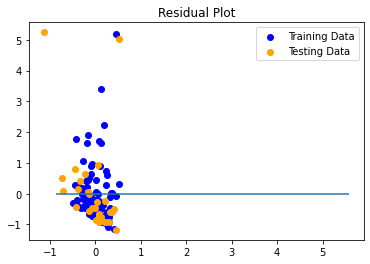

In [44]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()




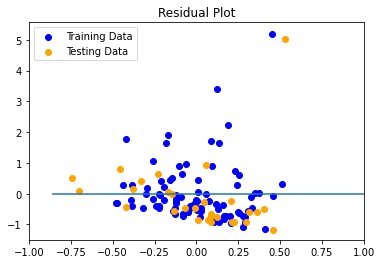

In [45]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.xlim(-1,1)
plt.title("Residual Plot")
plt.show()

In [46]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2


from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2.1698907768189315, R2: -0.14706807257499377


In [47]:
#Extract the model coeficient
model.coef_

array([[-0.03299813,  0.20856045,  0.04101834]])

In [48]:
#Extract the models intercept
model.intercept_

array([2.93456831e-16])

In [50]:
#Testing to see if the algorithm can predict data.
test_df = pd.DataFrame([[1.23,65,65]])

testdf_scaled = X_scaler.transform(test_df)
# testdf = pd.DataFrame([0.5])
result = model.predict(testdf_scaled)
print(y_scaler.inverse_transform(result))

[[105.34203356]]
